### SVM using PEGASOS and Stochastic Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Creating three types of datasets using make_blobs (docmentation).
Using make_blobs
Using make_moons
Using make_circles

First five rows and col values 
X1 : 
 [[2.51526543 1.11143935]
 [1.8155981  1.11969719]
 [2.69637316 0.62563218]
 [1.67280531 0.65930057]
 [1.89593761 5.18540259]]  
 y1 :
 [ 1  1  1  1 -1]


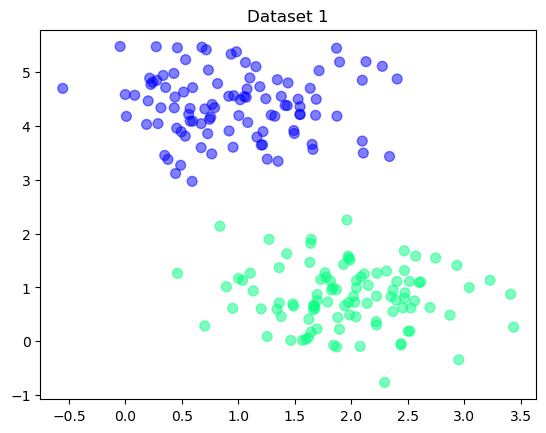

In [3]:
X1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
y1 = np.where(y1 <= 0, -1, 1)
print("First five rows and col values \nX1 : \n",X1[:5], " \n y1 :\n",y1[:5])
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 1")
plt.show()

First five rows and col values 
X2 : 
 [[-0.58000735  0.82298391]
 [-0.34864621  0.88834316]
 [-0.34214028  0.97519049]
 [ 1.99734686  0.17316655]
 [ 2.05635941  0.12115673]]  
 y2 :
 [ 1  1  1  1 -1]


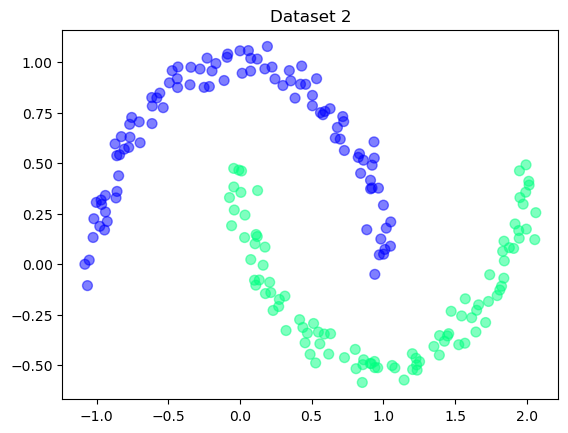

In [4]:
X2, y2 = make_moons(n_samples=200, noise=.05)
y2 = np.where(y2 <= 0, -1, 1)
print("First five rows and col values \nX2 : \n",X2[:5], " \n y2 :\n",y1[:5])
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 2")
plt.show()

First five rows and col values 
X1 : 
 [[-0.10487357 -0.55054665]
 [-0.4356954   0.97511267]
 [ 0.27781907 -0.42188341]
 [ 0.50029368 -0.1226767 ]
 [-0.39286991 -0.34930882]]  
 y3 :
 [ 1  1  1  1 -1]


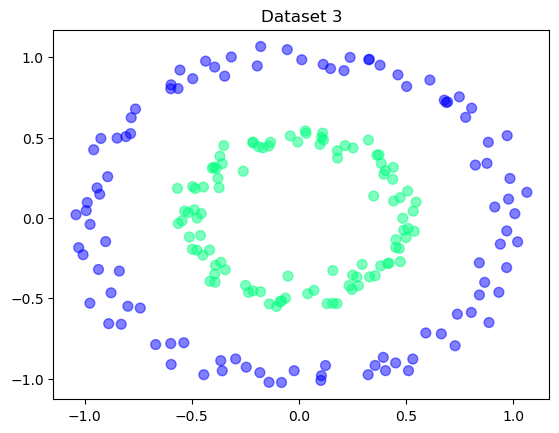

In [5]:
X3, y3 = noisy_circles = make_circles(n_samples=200, factor=.5, noise=.05)
y3 = np.where(y3 <= 0, -1, 1)
print("First five rows and col values \nX1 : \n",X3[:5], " \n y3 :\n",y1[:5])
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 3")
plt.show()

### SVM with dual problems

In [6]:
class SVM_Dual:

    def __init__(self, kernel='poly', degree=2, sigma=0.1, epoches=1000, learning_rate= 0.001):
        self.alpha = None
        self.b = 0
        self.degree = degree
        self.c = 1
        self.C = 1
        self.sigma = sigma
        self.epoches = epoches
        self.learning_rate = learning_rate

        if kernel == 'poly':
            self.kernel = self.polynomial_kernal # for polynomial kernal

    def polynomial_kernal(self,X,Z):
        return (self.c + X.dot(Z.T))**self.degree #(c + X.y)^degree

    def train(self,X,y):
        self.X = X
        self.y = y
        self.alpha = np.random.random(X.shape[0])
        self.b = 0
        self.ones = np.ones(X.shape[0]) 

        y_mul_kernal = np.outer(y, y) * self.kernel(X, X) # yi yj K(xi, xj)
        
        for i in range(self.epoches):
            gradient = self.ones - y_mul_kernal.dot(self.alpha) # 1 – yk ∑ αj yj K(xj, xk)

            self.alpha += self.learning_rate * gradient # α = α + η*(1 – yk ∑ αj yj K(xj, xk)) to maximize
            self.alpha[self.alpha > self.C] = self.C # 0<α<C
            self.alpha[self.alpha < 0] = 0 # 0<α<C

            loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_mul_kernal) # ∑αi – (1/2) ∑i ∑j αi αj yi yj K(xi, xj)
            
        alpha_index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]
        
        # for intercept b, we will only consider α which are 0<α<C 
        b_list = []        
        for index in alpha_index:
            b_list.append(y[index] - (self.alpha * y).dot(self.kernel(X, X[index])))

        self.b = np.mean(b_list) # avgC≤αi≤0{ yi – ∑αjyj K(xj, xi) }
            
    def predict(self, X):
        return np.sign(self.decision_function(X))
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return np.mean(y == y_hat)
    
    def decision_function(self, X):
        return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b
    
    # https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
    def plot(self, title='Plot for non linear SVM'):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap='winter', alpha=.5)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx = np.linspace(xlim[0], xlim[1], 50)
        yy = np.linspace(ylim[0], ylim[1], 50)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.decision_function(xy).reshape(XX.shape)
        ax.contour(XX, YY, Z, levels=[-1, 0, 1],linestyles=['--', '-', '--'])
        plt.title(title)
        plt.show()

Accuracy:  0.75


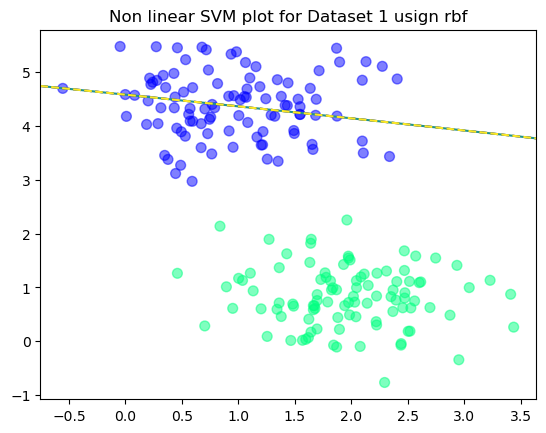

In [19]:
#dataset 1, using gaussian
svm_dual1 = SVM_Dual(kernel = 'poly')
svm_dual1.train(X1,y1)
print("Accuracy: ", svm_dual1.score(X1,y1))
svm_dual1.plot('Non linear SVM plot for Dataset 1 usign rbf')

Accuracy:  0.89


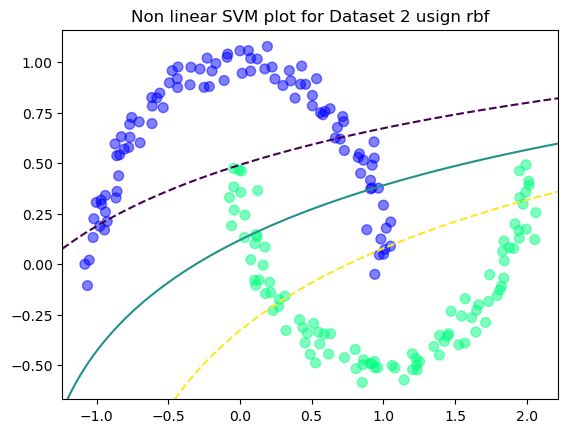

In [9]:
#dataset 2, using gaussian
svm_dual2 = SVM_Dual(kernel = 'poly')
svm_dual2.train(X2,y2)
print("Accuracy: ", svm_dual2.score(X2,y2))
svm_dual2.plot('Non linear SVM plot for Dataset 2 usign rbf')

1.0


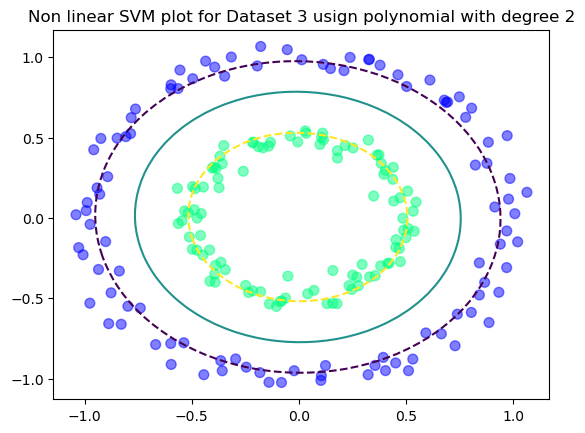

In [10]:
# using polynomial with degree 2, because its circular
svm_dual3 = SVM_Dual(kernel='poly', degree=2)
svm_dual3.train(X3,y3)
print(svm_dual3.score(X3,y3))
svm_dual3.plot('Non linear SVM plot for Dataset 3 usign polynomial with degree 2')

### Working with the pre-defined SVM Library

In [11]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

# defining a function to plot decision boundary according to the svm model
def plot(X, y, svm, title='SVM plot'):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()

Test accuracy 1.0
Train accuracy 1.0


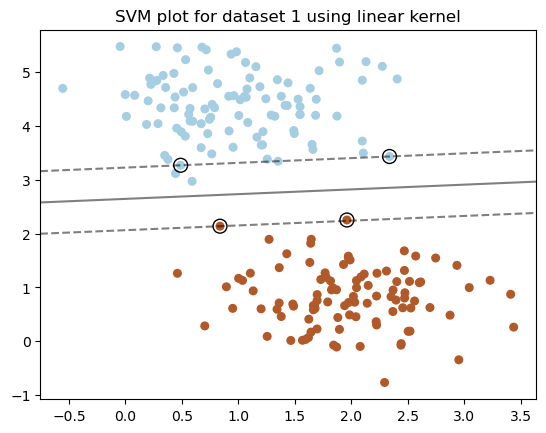

In [12]:
# for dataset 1
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=0) # creating testing and training set

svm1 = SVC(kernel='linear') # using linear kernal as our margin is a line
svm1.fit(X_train, y_train) # training the model

# accurcy print
print("Test accuracy", accuracy_score(svm1.predict(X_test), y_test))
print("Train accuracy", accuracy_score(svm1.predict(X_train), y_train))

plot(X1, y1, svm1, title='SVM plot for dataset 1 using linear kernel')

Test accuracy 0.9
Train accuracy 0.9533333333333334


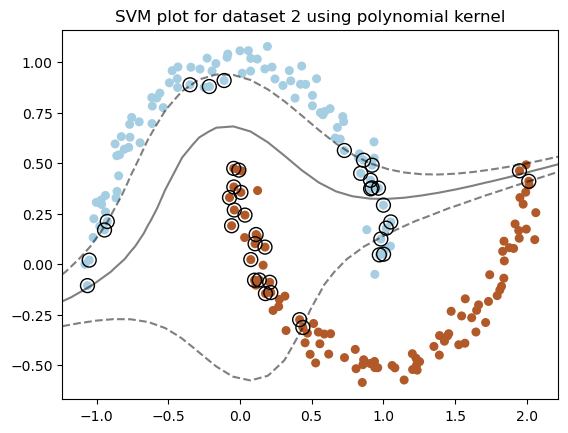

In [20]:
# for dataset 2
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=0) # creating testing and training set

svm2 = SVC(kernel='poly')  # using rbf kernal as our margin is non linear
svm2.fit(X_train, y_train) # training the model

# accurcy print
print("Test accuracy", accuracy_score(svm2.predict(X_test), y_test))
print("Train accuracy", accuracy_score(svm2.predict(X_train), y_train))
plot(X2, y2, svm2, title='SVM plot for dataset 2 using polynomial kernel')

Test accuracy 1.0
Train accuracy 1.0


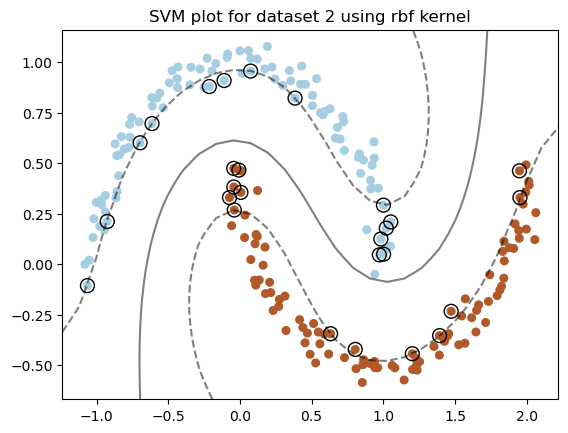

In [15]:
# for dataset 2
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=0) # creating testing and training set

svm2 = SVC(kernel='rbf')  # using rbf kernal as our margin is non linear
svm2.fit(X_train, y_train) # training the model

# accurcy print
print("Test accuracy", accuracy_score(svm2.predict(X_test), y_test))
print("Train accuracy", accuracy_score(svm2.predict(X_train), y_train))
plot(X2, y2, svm2, title='SVM plot for dataset 2 using rbf kernel')

Test accuracy 1.0
Train accuracy 1.0


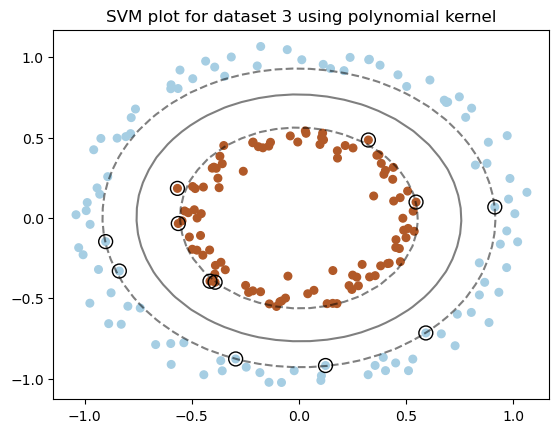

In [16]:
# for dataset 3
X_train, X_test, y_train, y_test = train_test_split(X3, y3, random_state=0) # creating testing and training set

svm3 = SVC(kernel='poly', degree=2) # using poly with degree 2 as our margin is circular
svm3.fit(X_train, y_train)  # training the model

# accurcy print
print("Test accuracy", accuracy_score(svm3.predict(X_test), y_test))
print("Train accuracy", accuracy_score(svm3.predict(X_train), y_train))
plot(X3, y3, svm3, title='SVM plot for dataset 3 using polynomial kernel')

Test accuracy 1.0
Train accuracy 1.0


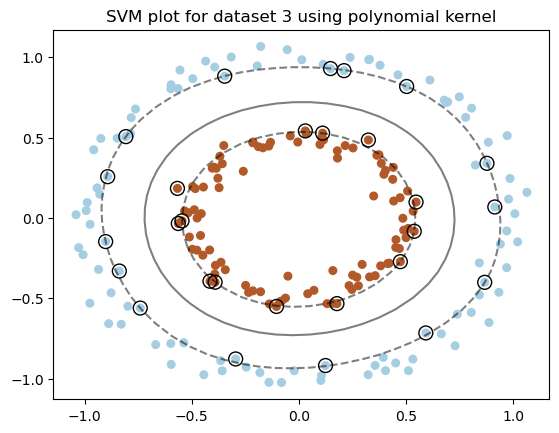

In [17]:
# for dataset 3
X_train, X_test, y_train, y_test = train_test_split(X3, y3, random_state=0) # creating testing and training set

svm3 = SVC(kernel='rbf', degree=2) # using poly with degree 2 as our margin is circular
svm3.fit(X_train, y_train)  # training the model

# accurcy print
print("Test accuracy", accuracy_score(svm3.predict(X_test), y_test))
print("Train accuracy", accuracy_score(svm3.predict(X_train), y_train))
plot(X3, y3, svm3, title='SVM plot for dataset 3 using polynomial kernel')